In [50]:
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from config import get_config
import argparse
from Learner import face_learner
from data.data_pipe import get_val_pair
from torchvision import transforms as trans

In [52]:
conf = get_config(training=False)

In [53]:
learner = face_learner(conf, inference=True)

{'data_path': PosixPath('data'), 'work_path': PosixPath('work_space'), 'model_path': PosixPath('work_space/models'), 'log_path': PosixPath('work_space/log'), 'save_path': PosixPath('work_space/save'), 'input_size': [112, 112], 'embedding_size': 512, 'use_mobilfacenet': True, 'net_depth': 50, 'drop_ratio': 0.6, 'net_mode': 'ir_se', 'device': device(type='cuda', index=0), 'test_transform': Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'data_mode': 'emore', 'vgg_folder': PosixPath('data/faces_vgg_112x112'), 'ms1m_folder': PosixPath('data/faces_ms1m_112x112'), 'emore_folder': PosixPath('data/faces_emore'), 'batch_size': 100, 'facebank_path': PosixPath('data/facebank'), 'threshold': 1.5, 'face_limit': 10, 'min_face_size': 30}
MobileFaceNet model generated


In [54]:
learner.load_state(conf, 'final.pth', model_only=True, from_save_folder=True)

loading images 1000
loading images 2000
loading images 3000
loading images 4000
loading images 5000
loading images 6000
loading images 7000
loading images 8000
loading images 9000
loading images 10000
loading images 11000
loading images 12000
loading images 13000
loading images 14000
loading images 15000
loading images 16000
loading images 17000
loading images 18000
loading images 19000
loading images 20000
loading images 21000
data shape: (43592, 3, 112, 112)
issame shape: (21796,)
vgg2_fp - accuray:0.7292359090736851, threshold:0.7340000000000001


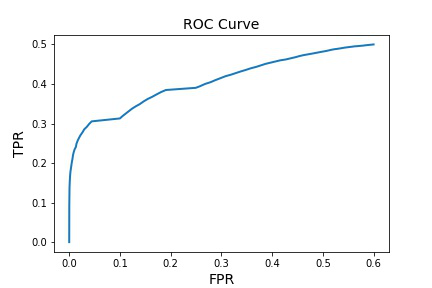

In [59]:
vgg2_fp, vgg2_fp_issame = get_val_pair('data', get_config().test_transform)
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [62]:
import numpy as np
np.save('data.npy', vgg2_fp)
np.save('issame.npy', vgg2_fp_issame)

vgg2_fp - accuray:0.7611488346485593, threshold:0.7000000000000001


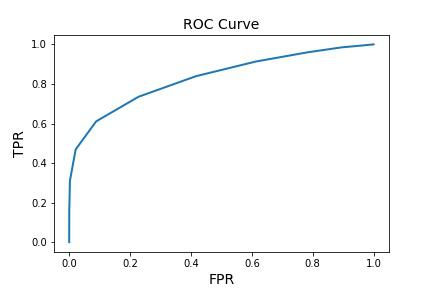

In [66]:
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
conf.use_mobilfacenet = True

In [ ]:
learner = face_learner(conf, inference=True)

In [ ]:
learner.load_state(conf, 'mobilefacenet.pth', True, True)

In [ ]:
vgg2_fp, vgg2_fp_issame = get_val_pair(conf.emore_folder, 'vgg2_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)